In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
# Load training set
df1 = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_10-18-16_kg_val.csv' , header=0)
df2 = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_10-18-16_kg_test.csv' , header=0)
df = pd.concat([df1, df2], axis=0)

df['link'] = df['relation'].apply(lambda x: 1 if x != 'no_link_known' else 0)
df

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,head,relation,tail,link
0,-0.022025,0.016013,0.008182,-0.016668,-0.017219,-0.015423,0.014788,-0.013625,0.004813,-0.010436,...,0.012363,0.012363,-0.012363,0.013047,0.012363,-0.009570,https://wormbase.org/wbdata/ortho_dis-5315,no_link_known,https://wormbase.org/species/c_elegans/gene/WB...,0
1,0.011442,0.023409,0.027197,-0.026088,0.011466,0.011485,-0.011461,-0.027663,-0.021202,-0.024895,...,0.013770,0.008617,-0.013770,0.019268,0.013770,-0.022629,https://wormbase.org/wbdata/pheno-125368,no_link_known,https://wormbase.org/species/c_elegans/gene/WB...,0
2,-0.002173,-0.002173,-0.002173,0.002173,-0.002173,-0.002173,0.002173,0.002173,0.002173,0.003111,...,-0.000944,0.011679,0.000944,-0.006678,-0.001933,0.000131,https://wormbase.org/wbdata/pheno-256301,no_link_known,https://wormbase.org/wbdata/pheno-405138,0
3,0.017005,0.017386,0.017313,-0.017392,0.017594,0.017359,-0.017394,-0.017409,-0.017698,-0.016948,...,0.018851,0.016371,-0.018774,-0.017279,0.018851,-0.004702,https://wormbase.org/wbdata/ortho_dis-26094,http://www.semanticweb.org/needed-terms#001,https://wormbase.org/species/c_elegans/gene/WB...,1
4,-0.009484,0.003228,-0.006519,-0.001198,-0.009484,-0.000704,0.006519,0.000694,0.004623,0.000704,...,-0.009442,-0.016714,0.013269,-0.011895,-0.011088,0.005852,https://wormbase.org/wbdata/pheno-366163,no_link_known,https://wormbase.org/wbdata/pheno-196950,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234345,-0.003296,0.003037,-0.001115,0.007448,-0.001115,-0.007448,-0.003037,0.001115,0.007448,0.007448,...,-0.007389,0.013422,0.002157,-0.013422,-0.007389,-0.007389,https://wormbase.org/wbdata/pheno-76741,no_link_known,https://wormbase.org/wbdata/pheno-80813,0
234346,0.000480,0.000517,0.000911,0.003378,0.004769,-0.008777,-0.000911,-0.000480,0.008814,0.008777,...,0.013418,0.009380,-0.017695,0.021031,0.013418,-0.022710,https://wormbase.org/wbdata/pheno-397090,http://semanticscience.org/resource/SIO_000281,https://wormbase.org/species/all/phenotype/WBP...,1
234347,0.001610,0.005263,0.000994,0.000131,0.005880,-0.009614,-0.001610,-0.000994,0.014961,0.010230,...,0.019138,0.016125,-0.019138,0.015792,0.016125,-0.004549,https://wormbase.org/wbdata/pheno-37510,http://semanticscience.org/resource/SIO_001279,https://wormbase.org/species/all/phenotype/WBP...,1
234348,-0.029945,-0.008771,0.006061,-0.006316,-0.018599,0.029698,-0.007143,0.017606,-0.015266,-0.025612,...,-0.002534,0.008700,0.002534,-0.008700,-0.002534,-0.002534,https://wormbase.org/species/c_elegans/gene/WB...,no_link_known,https://wormbase.org/wbdata/pheno-95971,0


In [3]:
df2 = df

In [4]:
df_num = df.drop(['head', 'relation', 'tail'], axis=1)
df_num

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,link
0,-0.022025,0.016013,0.008182,-0.016668,-0.017219,-0.015423,0.014788,-0.013625,0.004813,-0.010436,...,-0.009033,0.012363,-0.013047,0.012363,0.012363,-0.012363,0.013047,0.012363,-0.009570,0
1,0.011442,0.023409,0.027197,-0.026088,0.011466,0.011485,-0.011461,-0.027663,-0.021202,-0.024895,...,0.006576,0.009683,-0.019268,0.013770,0.008617,-0.013770,0.019268,0.013770,-0.022629,0
2,-0.002173,-0.002173,-0.002173,0.002173,-0.002173,-0.002173,0.002173,0.002173,0.002173,0.003111,...,-0.011501,-0.000944,0.000131,-0.000944,0.011679,0.000944,-0.006678,-0.001933,0.000131,0
3,0.017005,0.017386,0.017313,-0.017392,0.017594,0.017359,-0.017394,-0.017409,-0.017698,-0.016948,...,-0.016629,-0.018851,0.014528,0.018851,0.016371,-0.018774,-0.017279,0.018851,-0.004702,1
4,-0.009484,0.003228,-0.006519,-0.001198,-0.009484,-0.000704,0.006519,0.000694,0.004623,0.000704,...,0.009857,-0.007542,0.019304,-0.009442,-0.016714,0.013269,-0.011895,-0.011088,0.005852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234345,-0.003296,0.003037,-0.001115,0.007448,-0.001115,-0.007448,-0.003037,0.001115,0.007448,0.007448,...,-0.013422,-0.007389,-0.007389,-0.007389,0.013422,0.002157,-0.013422,-0.007389,-0.007389,0
234346,0.000480,0.000517,0.000911,0.003378,0.004769,-0.008777,-0.000911,-0.000480,0.008814,0.008777,...,0.007482,0.022879,-0.015594,0.013418,0.009380,-0.017695,0.021031,0.013418,-0.022710,1
234347,0.001610,0.005263,0.000994,0.000131,0.005880,-0.009614,-0.001610,-0.000994,0.014961,0.010230,...,-0.004721,0.019138,-0.012778,0.019138,0.016125,-0.019138,0.015792,0.016125,-0.004549,1
234348,-0.029945,-0.008771,0.006061,-0.006316,-0.018599,0.029698,-0.007143,0.017606,-0.015266,-0.025612,...,-0.008700,-0.002534,-0.002534,-0.002534,0.008700,0.002534,-0.008700,-0.002534,-0.002534,0


In [ ]:
df

In [5]:
# Experiment setup
s = setup(df_num, target = 'link', fold_strategy = 'stratifiedkfold', fold=10, train_size = 0.8, n_jobs=-1, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,1187
1,Target,link
2,Target type,Binary
3,Original data shape,"(934100, 101)"
4,Transformed data shape,"(3733100, 101)"
5,Transformed train set shape,"(2986510, 101)"
6,Transformed test set shape,"(746590, 101)"
7,Numeric features,100
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


# K Neighbors Classifier

In [6]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7388,0.8551,0.7470,0.7351,0.7410,0.4777,0.4777
1,0.7370,0.8534,0.7452,0.7332,0.7392,0.4739,0.4740
2,0.7379,0.8544,0.7447,0.7348,0.7397,0.4758,0.4758
3,0.7379,0.8547,0.7435,0.7353,0.7394,0.4757,0.4758
4,0.7382,0.8547,0.7450,0.7351,0.7400,0.4764,0.4765
5,0.7404,0.8567,0.7480,0.7369,0.7424,0.4808,0.4808
6,0.7384,0.8550,0.7483,0.7339,0.7410,0.4768,0.4769
7,0.7358,0.8533,0.7413,0.7333,0.7373,0.4716,0.4716
8,0.7382,0.8546,0.7421,0.7364,0.7392,0.4763,0.4763


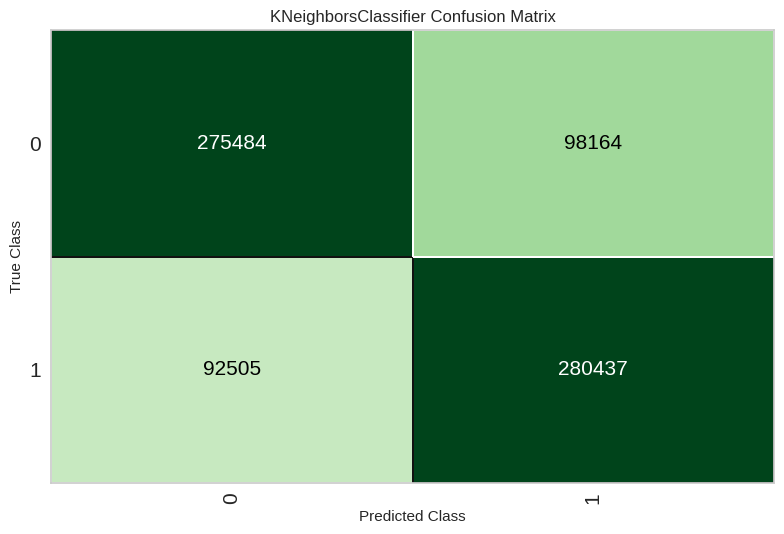

In [7]:
plot_model(knn, plot = 'confusion_matrix')

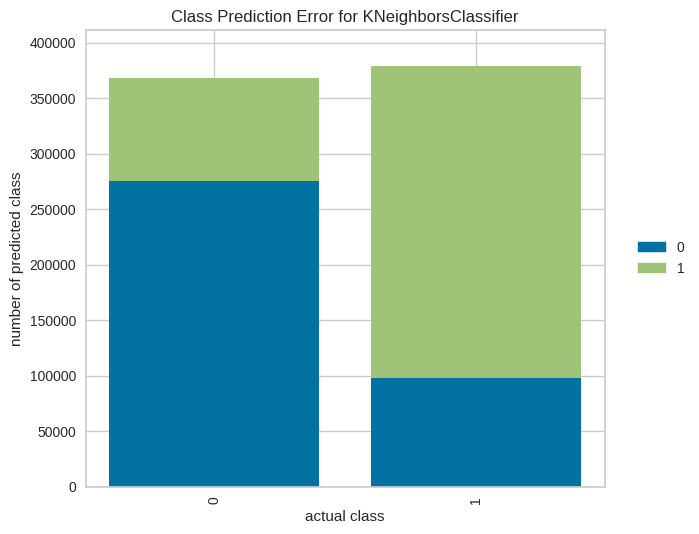

In [8]:
plot_model(knn, plot = 'error')

In [9]:
plot_model(knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


In [10]:
save_model(knn, 'models_classif/convkb/binary_emb_val/knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Naive Bayes

In [11]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6668,0.6744,0.7750,0.6372,0.6994,0.3336,0.3417
1,0.6641,0.6724,0.7752,0.6343,0.6977,0.3281,0.3365
2,0.6663,0.6737,0.7737,0.6370,0.6987,0.3326,0.3405
3,0.6661,0.6739,0.7743,0.6366,0.6987,0.3321,0.3402
4,0.6664,0.6738,0.7741,0.6370,0.6989,0.3328,0.3408
5,0.6671,0.6760,0.7745,0.6376,0.6994,0.3341,0.3421
6,0.6660,0.6735,0.7750,0.6363,0.6989,0.3319,0.3401
7,0.6661,0.6734,0.7738,0.6367,0.6986,0.3321,0.3401
8,0.6663,0.6744,0.7735,0.6370,0.6987,0.3326,0.3405


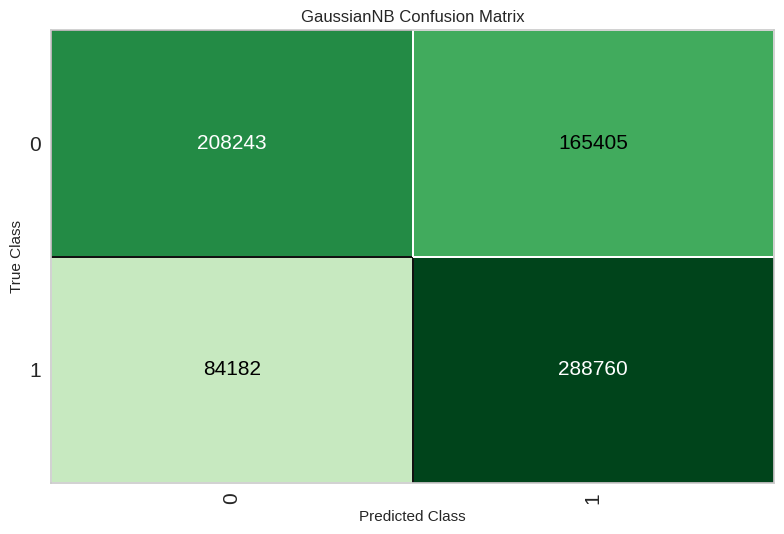

In [12]:
plot_model(nb, plot = 'confusion_matrix')

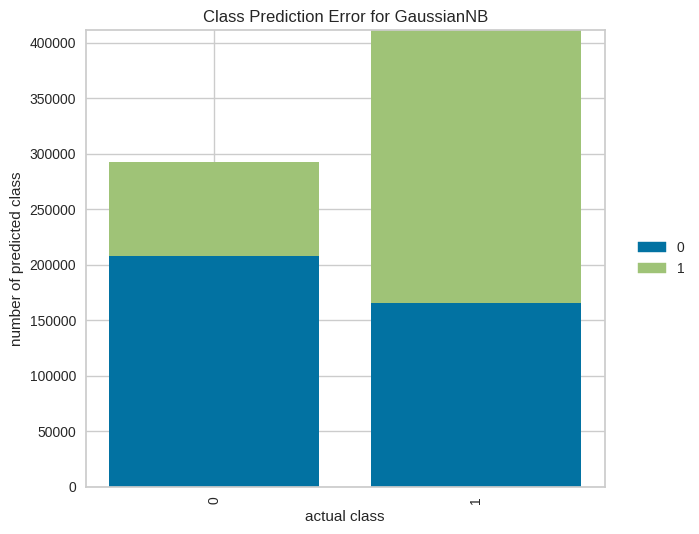

In [13]:
plot_model(nb, plot = 'error')

In [14]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,1e-09


In [15]:
save_model(nb, 'models_classif/convkb/binary_emb_val/nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                                               missing_values=nan,
                                                  

# Decision Tree Classifier

In [16]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7458,0.8689,0.4990,0.9857,0.6626,0.4917,0.5654
1,0.7451,0.8682,0.4999,0.9813,0.6623,0.4903,0.5627
2,0.7457,0.8685,0.4985,0.9862,0.6622,0.4914,0.5655
3,0.7454,0.8683,0.5007,0.9810,0.6630,0.4909,0.5631
4,0.7456,0.8690,0.5019,0.9793,0.6636,0.4912,0.5626
5,0.7474,0.8703,0.5036,0.9830,0.6660,0.4949,0.5668
6,0.7459,0.8689,0.5051,0.9745,0.6653,0.4918,0.5612
7,0.7432,0.8660,0.4974,0.9784,0.6595,0.4864,0.5586
8,0.7449,0.8680,0.4976,0.9848,0.6611,0.4899,0.5637


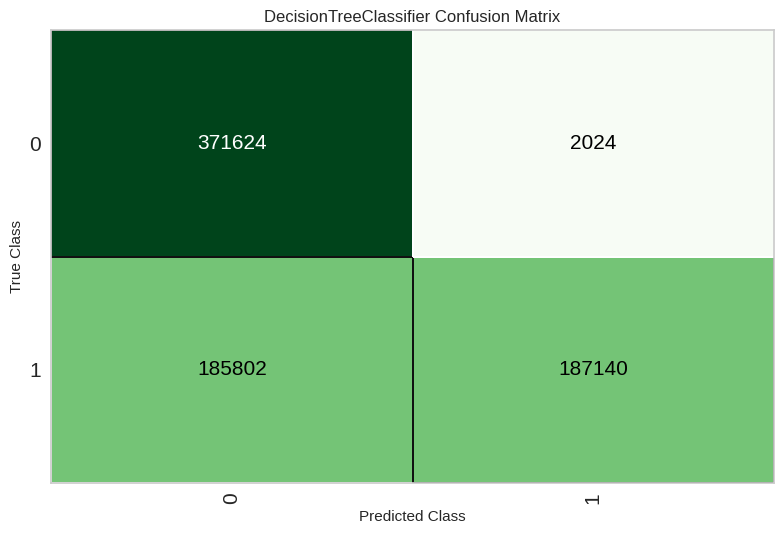

In [17]:
plot_model(dt, plot = 'confusion_matrix')

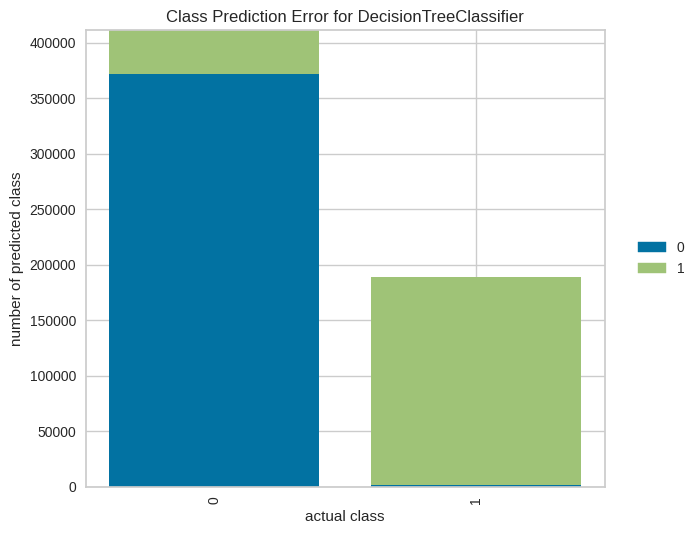

In [18]:
plot_model(dt, plot = 'error')

In [19]:
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [20]:
save_model(dt, 'models_classif/convkb/binary_emb_val/dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                                               missing_values=nan,
                                                  

# SVM - Linear Kernel

In [21]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6699,0.0000,0.7714,0.6413,0.7004,0.3398,0.3470
1,0.6671,0.0000,0.7717,0.6383,0.6987,0.3342,0.3417
2,0.6690,0.0000,0.7703,0.6406,0.6995,0.3379,0.3451
3,0.6691,0.0000,0.7709,0.6406,0.6997,0.3382,0.3454
4,0.6691,0.0000,0.7710,0.6405,0.6997,0.3381,0.3453
5,0.6702,0.0000,0.7720,0.6414,0.7007,0.3403,0.3476
6,0.6690,0.0000,0.7718,0.6403,0.6999,0.3380,0.3454
7,0.6687,0.0000,0.7707,0.6402,0.6994,0.3374,0.3446
8,0.6692,0.0000,0.7710,0.6406,0.6998,0.3383,0.3456


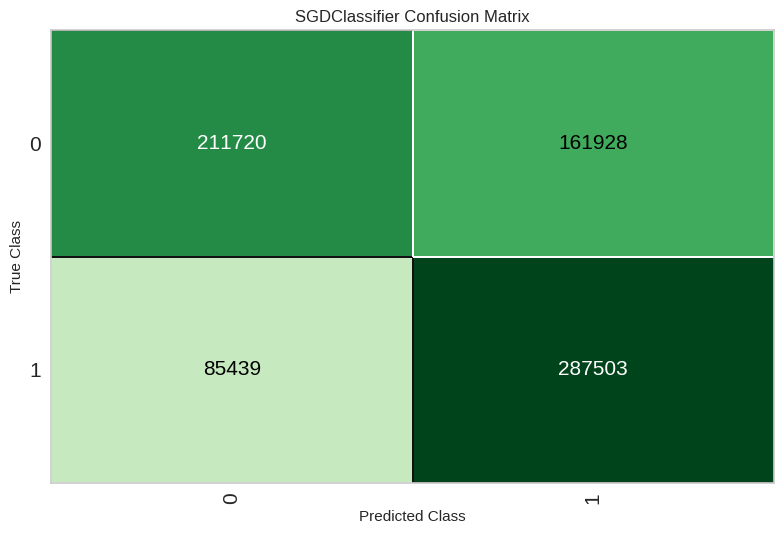

In [22]:
plot_model(svm, plot = 'confusion_matrix')

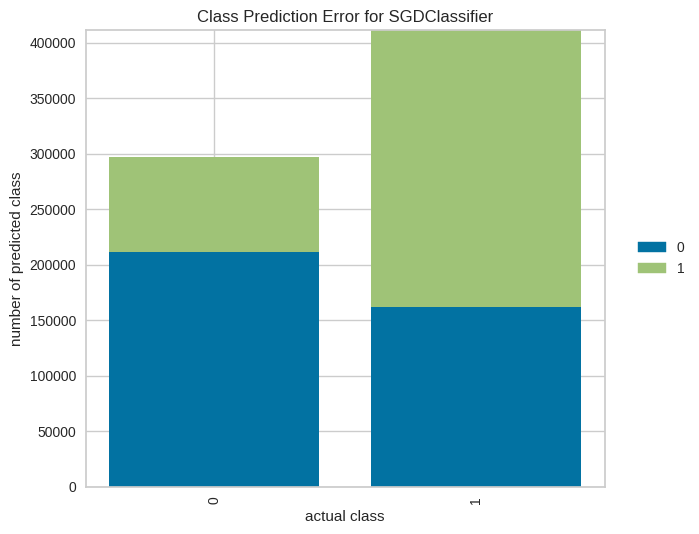

In [23]:
plot_model(svm, plot = 'error')

In [24]:
plot_model(svm, plot = 'parameter')

,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


In [25]:
save_model(svm, 'models_classif/convkb/binary_emb_val/svm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False,

# Ridge Classifier

In [26]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6717,0.0000,0.8007,0.6366,0.7093,0.3435,0.3555
1,0.6690,0.0000,0.8019,0.6336,0.7079,0.3380,0.3506
2,0.6711,0.0000,0.8008,0.6360,0.7089,0.3422,0.3544
3,0.6711,0.0000,0.8013,0.6358,0.7090,0.3422,0.3544
4,0.6708,0.0000,0.8006,0.6357,0.7087,0.3416,0.3537
5,0.6713,0.0000,0.8020,0.6358,0.7093,0.3425,0.3548
6,0.6709,0.0000,0.8012,0.6356,0.7089,0.3417,0.3539
7,0.6703,0.0000,0.8002,0.6352,0.7083,0.3405,0.3526
8,0.6702,0.0000,0.7994,0.6353,0.7080,0.3404,0.3523


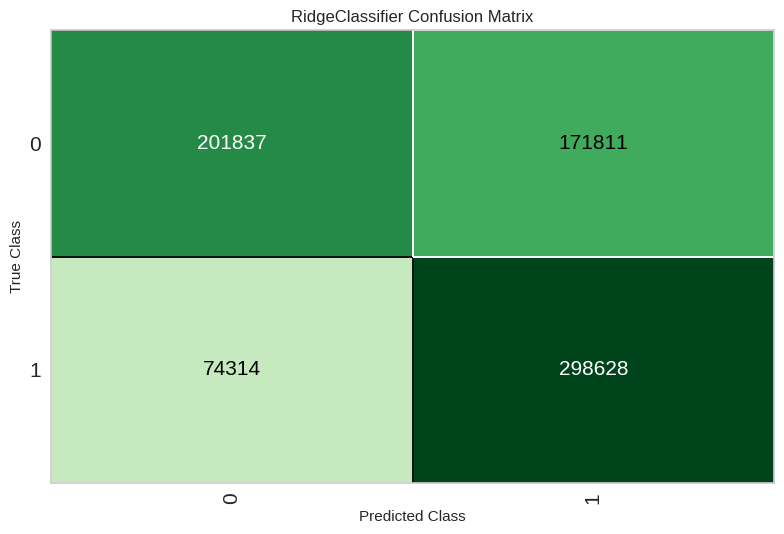

In [27]:
plot_model(ridge, plot = 'confusion_matrix')

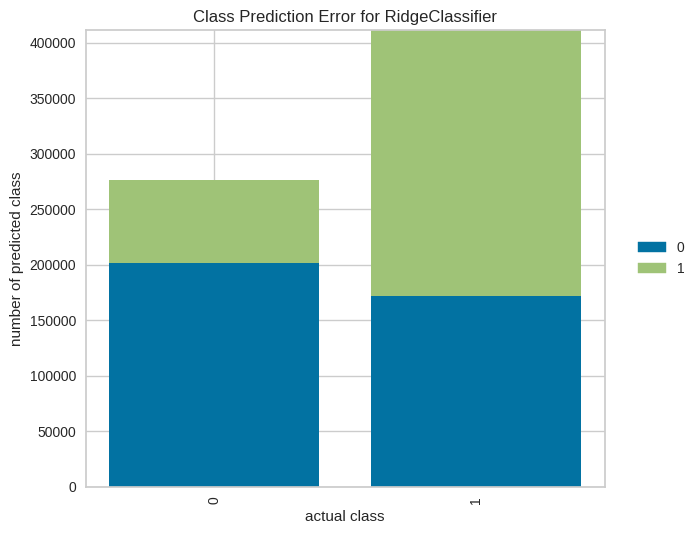

In [28]:
plot_model(ridge, plot = 'error')

In [29]:
plot_model(ridge, plot = 'parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,1187
solver,auto
tol,0.0001


In [30]:
save_model(ridge, 'models_classif/convkb/binary_emb_val/ridge')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Random Forest

In [31]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7481,0.8730,0.7505,0.7471,0.7488,0.4963,0.4963
1,0.7471,0.8720,0.7500,0.7457,0.7478,0.4941,0.4941
2,0.7475,0.8723,0.7495,0.7465,0.7480,0.4949,0.4950
3,0.7478,0.8727,0.7489,0.7473,0.7481,0.4955,0.4955
4,0.7478,0.8727,0.7527,0.7456,0.7491,0.4957,0.4957
5,0.7495,0.8744,0.7524,0.7482,0.7503,0.4990,0.4990
6,0.7481,0.8730,0.7547,0.7450,0.7498,0.4962,0.4963
7,0.7454,0.8703,0.7472,0.7446,0.7459,0.4907,0.4907
8,0.7472,0.8721,0.7460,0.7479,0.7470,0.4945,0.4945


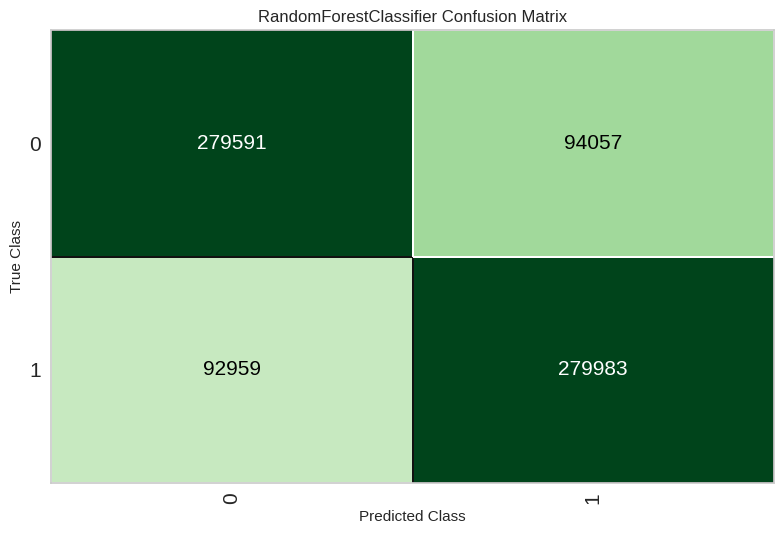

In [32]:
plot_model(rf, plot = 'confusion_matrix')

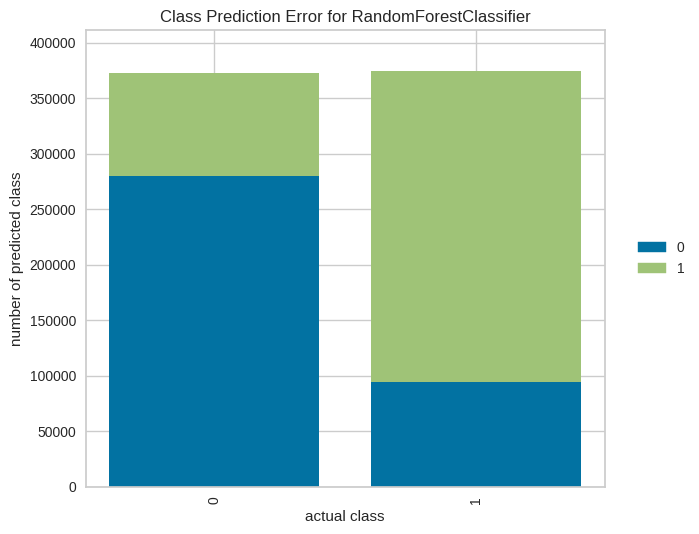

In [33]:
plot_model(rf, plot = 'error')

In [34]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [35]:
save_model(rf, 'models_classif/convkb/binary_emb_val/rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, c

# Quadratic Discriminant Analysis

In [36]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6369,0.6790,0.7726,0.6077,0.6803,0.2737,0.2844
1,0.6337,0.6770,0.7722,0.6048,0.6783,0.2673,0.2782
2,0.6367,0.6785,0.7736,0.6074,0.6805,0.2733,0.2842
3,0.6360,0.6793,0.7717,0.6070,0.6795,0.2719,0.2825
4,0.6365,0.6794,0.7726,0.6074,0.6801,0.2729,0.2836
5,0.6363,0.6793,0.7741,0.6069,0.6804,0.2726,0.2835
6,0.6370,0.6801,0.7744,0.6076,0.6809,0.2740,0.2850
7,0.6374,0.6803,0.7744,0.6079,0.6811,0.2747,0.2856
8,0.6365,0.6784,0.7717,0.6076,0.6799,0.2730,0.2836


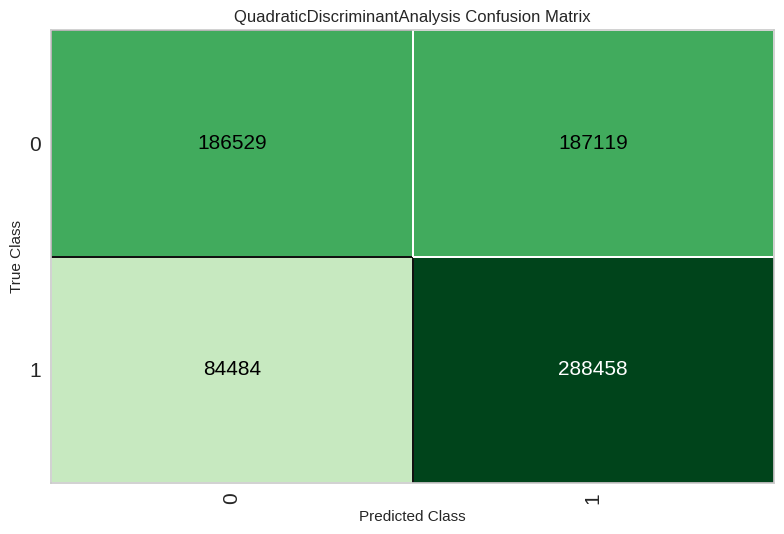

In [37]:
plot_model(qda, plot = 'confusion_matrix')

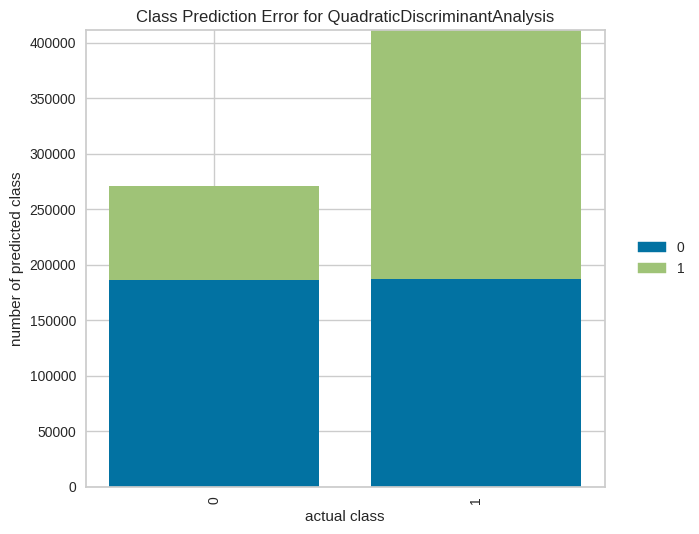

In [38]:
plot_model(qda, plot = 'error')

In [39]:
plot_model(qda, plot = 'parameter')

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


In [40]:
save_model(qda, 'models_classif/convkb/binary_emb_val/qda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                             

# Linear Discriminant Analysis

In [41]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6718,0.6871,0.8005,0.6367,0.7092,0.3435,0.3555
1,0.6689,0.6852,0.8014,0.6335,0.7077,0.3377,0.3502
2,0.6711,0.6872,0.8006,0.6360,0.7089,0.3422,0.3543
3,0.6712,0.6868,0.8011,0.6359,0.7090,0.3423,0.3545
4,0.6707,0.6868,0.8004,0.6356,0.7085,0.3414,0.3534
5,0.6713,0.6879,0.8017,0.6359,0.7092,0.3425,0.3548
6,0.6709,0.6872,0.8008,0.6357,0.7088,0.3417,0.3539
7,0.6704,0.6864,0.8001,0.6354,0.7083,0.3408,0.3528
8,0.6701,0.6867,0.7988,0.6353,0.7078,0.3401,0.3520


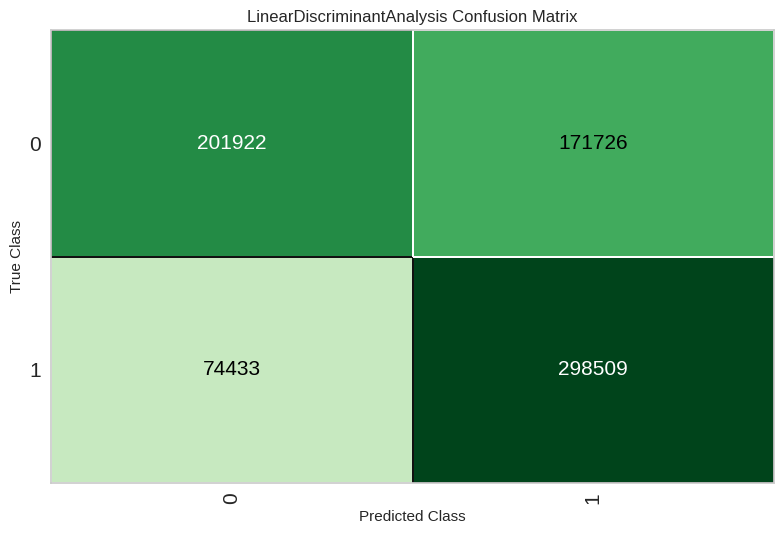

In [42]:
plot_model(lda, plot = 'confusion_matrix')

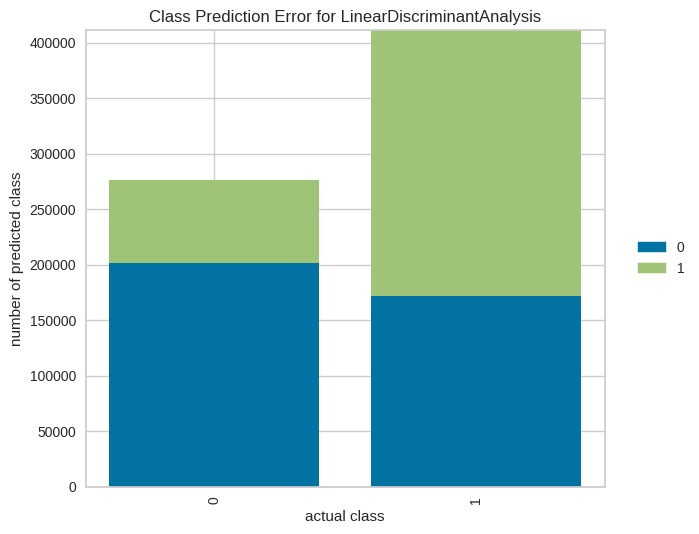

In [43]:
plot_model(lda, plot = 'error')

In [44]:
plot_model(lda, plot = 'parameter')

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [45]:
save_model(lda, 'models_classif/convkb/binary_emb_val/lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Extra Trees

In [46]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7480,0.8730,0.5079,0.9773,0.6685,0.4961,0.5656
1,0.7471,0.8720,0.5090,0.9719,0.6681,0.4942,0.5621
2,0.7473,0.8722,0.5073,0.9760,0.6676,0.4947,0.5640
3,0.7477,0.8727,0.5098,0.9729,0.6690,0.4955,0.5635
4,0.7478,0.8727,0.5105,0.9717,0.6694,0.4956,0.5631
5,0.7494,0.8743,0.5123,0.9747,0.6716,0.4989,0.5667
6,0.7479,0.8729,0.5136,0.9667,0.6708,0.4959,0.5614
7,0.7453,0.8702,0.5067,0.9694,0.6656,0.4907,0.5584
8,0.7472,0.8721,0.5065,0.9767,0.6671,0.4944,0.5641


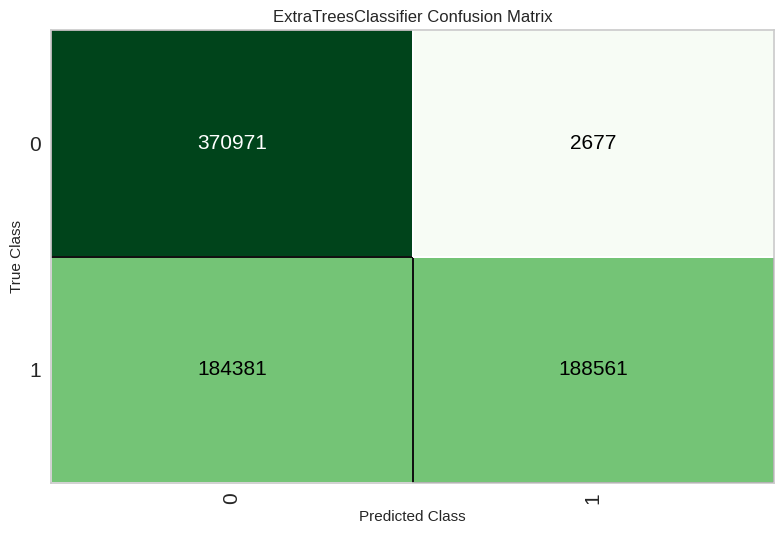

In [47]:
plot_model(et, plot = 'confusion_matrix')

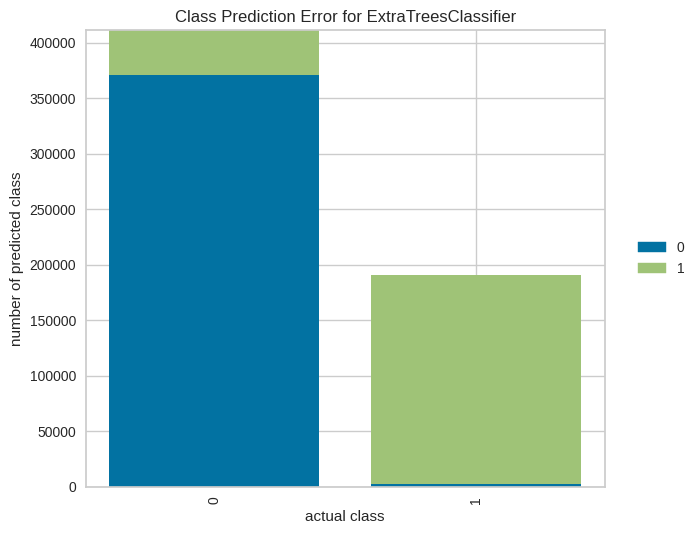

In [48]:
plot_model(et, plot = 'error')

In [49]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [50]:
save_model(et, 'models_classif/convkb/binary_emb_val/et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, crit

# Light Gradient Boosting Machine

In [51]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6812,0.7169,0.8099,0.6442,0.7176,0.3624,0.3750
1,0.6783,0.7145,0.8088,0.6414,0.7154,0.3565,0.3693
2,0.6804,0.7168,0.8088,0.6436,0.7168,0.3608,0.3733
3,0.6802,0.7166,0.8095,0.6433,0.7169,0.3604,0.3731
4,0.6805,0.7170,0.8100,0.6434,0.7172,0.3609,0.3736
5,0.6803,0.7173,0.8096,0.6433,0.7169,0.3605,0.3732
6,0.6804,0.7162,0.8099,0.6434,0.7171,0.3608,0.3735
7,0.6796,0.7154,0.8077,0.6430,0.7160,0.3591,0.3715
8,0.6802,0.7162,0.8095,0.6432,0.7168,0.3603,0.3730


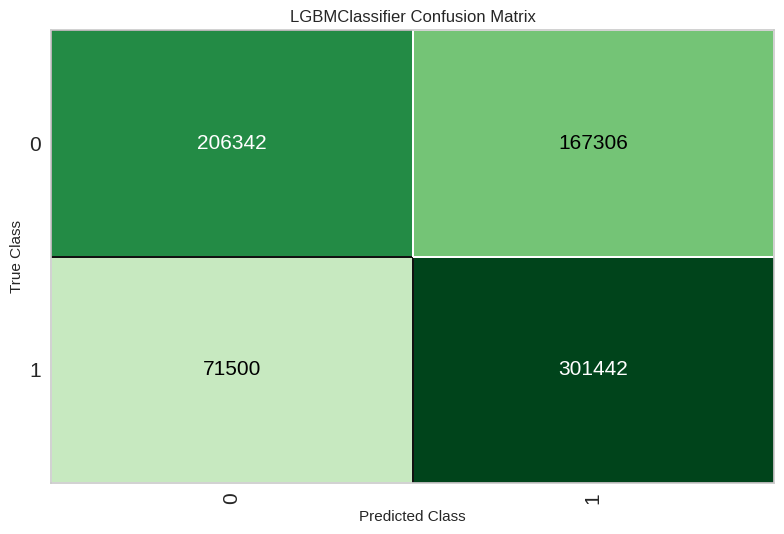

In [52]:
plot_model(lightgbm, plot = 'confusion_matrix')

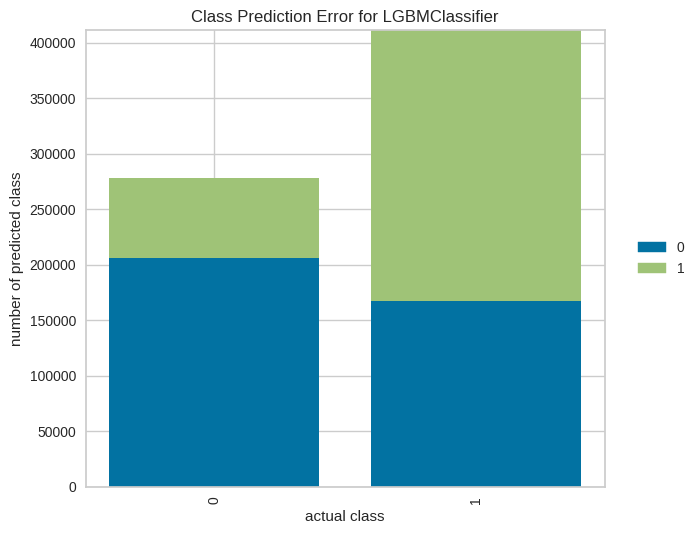

In [53]:
plot_model(lightgbm, plot = 'error')

In [54]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [55]:
save_model(lightgbm, 'models_classif/convkb/binary_emb_val/lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, impo

# MLP Classifier

In [56]:
mlp = create_model('mlp')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:00:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,MLP Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
plot_model(mlp, plot = 'confusion_matrix')

In [ ]:
plot_model(mlp, plot = 'error')

In [ ]:
plot_model(mlp, plot = 'parameter')

In [ ]:
save_model(mlp, 'models_classif/convkb/binary_emb_val/mlp')